# Lecture Notes on Factor Analysis and I-Vectors
# Abstract 
该文档 提供了FA 因子分析模型的详细的公式, 因子分析模型 认为观测变量实际由低维空间的隐变量**真实数据(真实分布)** 以及噪声生成, 低维空间由V矩阵描述.
因子分析模型, 认为 观测变量 服从 混合高斯模型GMM , 隐变量的先验概率是高斯分布. 
通过因子分析模型, 将一句utt 抽取为固定长度的隐变量 ivector

# 1 Factor Analysis
## 1.1 建模 x 分布
X = {$x_1$, $x_2$ .. $x_n$} 是 R 维向量训练集合.
因子分析模型认为 某个$x_i$, 是根据如下模型 由 $z_i$ 生成
$$ X_i = m + Vz_i + \epsilon_i\tag{1} $$
**---------------------------------------------**  
**m 是 X的均值,**  
**而 $x_i$ 则是以 $ m+ Vz_i$ 为均值的.**  
**因子分析的核心就是, 样本集合X有自己的均值方差分布, 而每个样本x_i 也都具有自己的分布,并且是以样本集合均值 + 本样本的本征因子为均值**  
**---------------------------------------------**  
V 是一个低秩矩阵R X D,  
$z_i$ 是D维 隐变量因子, 服从$N(z|0, I)$,  
$\epsilon_i$ 是 残余噪声, 服从$N(z|0, \Sigma)$,  
**由于每个$x_i$的具有均值 $m+Vz_i$, 协方差$\epsilon$, 建模时携带$z_i$**  
**因此每个$x_i$ 满足 在$z_i$条件下的 均值 -- $m + Vz_i$, 协方差 -- $\epsilon_i$的 条件高斯分布**  

x 的边缘分布为
$$ \begin{eqnarray}
    p(x_i)& = & \int {p(x_i|z_i)p(z_i)} {\rm d}x \\
    & = & \int {N(x|m + Vz, \Sigma)N(z|0, I)} {\rm d}x\tag{2}  \\
    & = & N(x|m, VV^T + \Sigma)
\end{eqnarray} $$

如果没在因子分析模型下, 对 p(x) 的建模可以简单为一个 $ N(X|\mu, \Sigma) $, 但是在因子分析模型中,    

### ----建模为p(x|z)的原因----
**X被建模为 $ x = m + Vz $ 因此认为x是一个条件数据, 所以对x z 的建模 必然是 $p(x|z)$ , 通过联合概率边缘化得到 p(x) 边缘分布, 用来进作为极大似然函数. 这样才引入z 并且引入本征空间军阵V, 通过极大似然估计能够计算V**

经过推导 p(X) 也是一个 高斯分布

## 1.2 EM 算法
### M-step 最大化 联合概率似然(先计算E步 或M步没关系)
令 参数集合为 $ w = {m , V, \Sigma} $ 
$$ \begin{eqnarray}
    Q(w) & = & E_z ln p(X, Z| w) \\
    & = & E_z\big\{\sum_i {ln p(x_i | z_i, w) p(z_i)}\big\} \\
    & = & E_z\Big\{\sum_i {ln [N(x_i | m + V z_i, \Sigma) N(z_i|0, I)]} \Big\}  
\end{eqnarray} $$

建模为 $ p(x_i | z_i, w) $的原因 就是上面提到的 x 本身被建模为一个条件数据.并且我们希望估计出V.    
**EM 算法 本质上还是极大似然估计, 需要 似然函数是 $ P(X) $ , 经过推到, 得到 可以 极大化 $Q(W)$ 函数即可 极大似然函数.得到 假设参数.**  
建模参数V的函数是 $ p(x | z) $, 

本质上, 我们任何变量的分布都不知道的, 我们只具有X 数据, 希望以高斯模型 对X 进行概率密度估计, 估计出 模型假设参数.  
这时候我们的模型 可以不建模隐变量, 直接估计数据的高斯模型 假设参数.   
但是我们的目的不是为了简单的进行概率密度函数估计, 而是想要对 X 进行因子分析 计算每个x的本征因子z, 所以建模时候引入z, 因此得到的数据在模型中 认为是x在条件z的条件数据, 因此建模概率 $ p(x|z) $ , 因此引入本征空间参数V, 估计就需要进行极大似然估计法, 因为有隐变量, 因此使用EM算法.  
展开Q函数
$$ \begin{eqnarray}
    Q(w) & = & - \sum\limits_{i}E_z\big\{\frac{1}{2}log|\Sigma| + \frac{1}{2}(x_i - m - Vz_i)^T\Sigma^{-1} (x_i - m - Vz_i)\big\} \\
    & = & \sum\limits_{i}\Big[ -\frac{1}{2} log|\Sigma| - \frac{1}{2} (x_i - m)^T \Sigma^{-1} (x_i - m) \Big]
    + \sum\limits_{i}(x_i - m)^T \Sigma^{-1} V <z_i|x_i> - \frac{1}{2}\Big[\sum\limits_{i}<z_i^T V^T \Sigma^{-1} V z_i | x_i>\Big]
\end{eqnarray} $$

求导为0  ==> (这里假设的X是服从高斯分布, 不是混合高斯分布, 所以没有$N_c$ - 0阶统计量)
$$ m = \frac{1}{N}\sum\limits_{i=1}{N}x_i $$
$$ V = \Big[ \sum\limits_{i}(x_i - m)<z_i|x_i>^T\Big] \Big[\sum\limits_{i}<z_iz_i^T|x_i>\Big]^T $$
$$ \Sigma = \frac{1}{N}\sum\limits_{i}\Big[(x_i - m)(x_i - m)^T - V<z_i | x_i>(x_i - m)^T \Big] $$

其中 $<z_i | x_i>$ 等是 在 $x_i$的条件数据, 原本有 $ z_i ~ N(0, 1) $ , 在数据量够大情况下, $ < z_i | x_i > ~ N(0, 1) $   
  
以上是在一次M-step 中 初始化$z_i$ $\Sigma$ V 计算更新得到的 V $\Sigma$ , 后续进行E-step 计算 $z_i$的后验概率迭代更新参数


### E-step 计算$z_i$ 后验概率

$$ \begin{eqnarray}
    p(z_i | x_i, \omega) & \propto & p(x_i | z_i , \omega) p(z_i) \\
    & = & exp\Big\{-\frac{1}{2}(x_i - m - Vz_i)^T \Sigma^{-1}(x_i - m - Vz_i) - \frac{1}{2}z_i^T z_i \Big\} \\
    & = & exp\Big\{z_i^T V^T \Sigma^{-1} (x_i - m) - \frac{1}{2}z_i^T(I + V^T \Sigma^{-1}V ) z_i\Big\}\tag{8}\label{8} 
\end{eqnarray} $$

如上结果公式(8), 经过处理 可以得到 $z_i ~ N(\mu_i , I) $
化简公式为 高斯分布形式为

$$ \begin{eqnarray}
    N(z|\mu_z , L_z) & \propto & exp \Big\{ -\frac{1}{2}(z - \mu_z)^T L^{-1} (z - \mu_z) \Big\}\tag{9}\label{9}
\end{eqnarray} $$

结果得到　　
  
L 是　$z_i$ 的后验协方差矩阵
$$ L^{-1} =  (I + V^T \Sigma^{-1} V)^{-1} $$  
  
$<z_i | x_i>$ 是 $<z_i>$ 的后验概率均值
$$  <ｚ_i | x_i> = L^{-1} V^T \Sigma^{-1}(x_i - m) $$　　
  
$<ｚ_i z_i^T | x_i>$是协方差矩阵　- 均值内积
$$  <ｚ_i z_i^T | x_i> = L^{-1} - <z_i | x_i> <z_i^T| x_i> $$　　


结果为　(10)

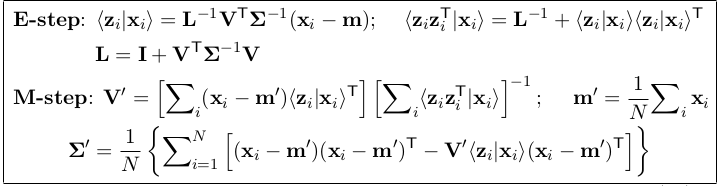

## 1.3 小节
首先因子分析模型, x被建模为 $x = m+ Vz_i + \epsilon$,  
$z_i \sim N(0, I)$   
$\epsilon \sim N(0, \Sigma)$   
说明x在z条件下服从高斯分布$ p(X|Z) ~ N(m+Vz_i , \Sigma)$  
然后推导得到 $P(X) \sim N(x|m, VV^T + \Sigma)$ 分布, 可以通过极大似然估计方法直接求解, 但是利用EM算法求解更方便  
推导得到 Q 函数  
$$ \begin{eqnarray}
    Q(w) & = & - \sum\limits_{i}E_z\big\{\frac{1}{2}log|\Sigma| + \frac{1}{2}(x_i - m - Vz_i)^T\Sigma^{-1} (x_i - m - Vz_i)\big\} \\
    & = & \sum\limits_{i}\Big[ -\frac{1}{2} log|\Sigma| - \frac{1}{2} (x_i - m)^T \Sigma^{-1} (x_i - m) \Big]
    + \sum\limits_{i}(x_i - m)^T \Sigma^{-1} V <z_i|x_i> - \frac{1}{2}\Big[\sum\limits_{i}<z_i^T V^T \Sigma^{-1} V z_i | x_i>\Big]
\end{eqnarray} $$  

以及隐变量$z_i$后验概率  

$$ \begin{eqnarray}
    p(z_i | x_i, \omega) & \propto & p(x_i | z_i , \omega) p(z_i) \\
    & = & exp\Big\{-\frac{1}{2}(x_i - m - Vz_i)^T \Sigma^{-1}(x_i - m - Vz_i) - \frac{1}{2}z_i^T z_i \Big\} \\
    & = & exp\Big\{z_i^T V^T \Sigma^{-1} (x_i - m) - \frac{1}{2}z_i^T(I + V^T \Sigma^{-1}V ) z_i\Big\}
\end{eqnarray} $$
结果能够得到更新公式, 更新 $V$ $\Sigma$

# 2 IVector
## 2.1 Gaussian Mixture Model
首先建模 声学特征 由一个 高斯混合模型生成UBM(通用背景模型, 建模所有声学特征)  

对一个utt_i 声学特征为 $O_i =\{o_{i1}, o_{i2}, ...,o_{iT_i}\}$  
$$ p(o_{it}) = \sum\limits_{c=1}^{C} \lambda_c N(o_{it} | \mu_c, \Sigma_c) $$

$\{\lambda_c, \mu_c, \Sigma_c \} $ 是 GMM 的 c 个分量模型

## 2.2 Factor Analysis Model
i 表示第i个utt  
t 表示utt内的第t帧  
c 表示UBM中的第c个分量模型  

### utt GMM-supervector
对所有声学特征帧的生成模型 UBM, 均值超矢量为 $\mu^{(b)}$, 那么对一句utt进行描述的 自适应utt- $O_i$模型的均值为称为 utt的自适应超矢量 $\mu_i$   
这里$\mu_i$ 描述的是一个utt的 GMM描述均值, 而这个GMM, 是通过对UBM使用数据$O_i$ 自适应得到的描述这句utt的背景模型.  

### factor analysis model 
因此对所有utt 因子分析模型可以建模为
$$ \mu_i = \mu^{(b)} + T w_i +\epsilon_i $$  
其中$w_i$ 是带有协方差的, 因此 属于某个类别的 $w_i$ 的均值期望是一个类A的ivector, 类内不同样本的差异, 是$w_A$ 的协方差描述  
分量模型  
$$ \mu_{ic} = \mu_c^{(b)} + Tc w_i +\epsilon_{ic} $$
**utt 是以 $\mu^{(b)}$ 为均值的数据,** 
**得到$\mu_i$ 则是以 $\mu^{(b)} + T w_i$为均值, $\epsilon_i$ 为方差的数据**  
**-------------------------------------               因子分析本质**  
#### 因子隐变量后验概率
对应一个给定的utt $O_i$, 对应的描述整句utt的 ivector $x_i$ 是 $w_i$的后验概率均值 -- $x_i = < w_i | O_i>$  
为了表示 $x_i$, 我们可以用 $w_i$ 和 分量指示变量 $y_{i,t,c}$ 的联合后验概率表示,   
$w_i$ $y_{i,t,c}$ 的联合后验概率为 $p(w_i, y_{i,t,c})$ 
$$ \begin{eqnarray}
    p(w_i , y_{i,.,.} | O_i) & \propto & p(O_i | w_i, y_{i,.,.})\ p(y_{i,.,.})\ p(w_i) \\
    & = & \prod\limits_{t=1}^{T} \prod\limits_{c=1}^{C} \big[\lambda_c\ p(o_{it}|y_{i,t,c}=1, w_i)\big]^{y_{i,t,c}}\ p(w_i) \\
     & = & \ p(w_i)\prod\limits_{t=1}^{T} \prod\limits_{c=1}^{C} \big[\ p(o_{it}|y_{i,t,c}=1, w_i)\big]^{y_{i,t,c}}\lambda_c^{y_{i,t,c}}\tag{15}\label{15} \\
\end{eqnarray} $$

在训练时, 我们认为 每帧数据都是由一个分量模型产生的, 所以 对于 一个 $o_{(i,t)}$  所有的 $y_{i,t,c}$ 中只有一个为1, 其他为0 (one-of-k) , 由此我们从 (15) $w_i\ \ y_{i,.,.}$ 联合概率中去掉$y_{i,.,.}$ 引入的概率 得到 $p(w_i | O_i)$  

$H_{ic}$ 表示$O_i$ 中所有对齐到c分量模型的帧索引列表 $o_{it}$.  
  
根据因子分析模型中 因子后验概率期望公式(9)求解得到  
因子后验概率期望为:  
$$ \begin{eqnarray}
    <w_i | O_i> & = & L_i^{-1}\ \sum\limits_{c=1}^{C}\ \sum\limits_{t\in H_{ic}} T_c^T\Big(\Sigma_c^{(b)}\Big)^{-1}(o_{it} - \mu_c^{(b)}) \\
    & = & L_i^{-1}\ \sum\limits_{c=1}^{C} T_c^T\Big(\Sigma_c^{(b)}\Big)^{-1}\ \sum\limits_{t\in H_{ic}}(o_{it} - \mu_c^{(b)}) \tag{17}
\end{eqnarray} $$  

因子后验协方差为:  
$$ L_i = I + \sum\limits_{c=1}^{C}\ \sum\limits_{t\in H_{ic}}T_c^T\Big(\Sigma_c^{(b)}\Big)^{-1}T_c\tag{19} $$

推导式:  
$$ <w_i w_i^T | O_i> = L_i^{-1} + <w_i| O_i><w_i| O_i>^T\tag{18} $$ 



(17)(18)(19)中 $ \sum\limits_{t\in H_{ic}} $ 的求解是个问题: 引出 计算需要统计量

#### 0-order 1-order 统计量
公式中的求和式 $ \sum\limits_{t\in H_{ic}} $ 的求解方法可以 1 hard decision  2 soft decision 两种方法.

每个数据帧 $ o_{it} $ 在 各个分量上的响应度(各个分量在 O_i 的后验概率)为   

$$ \begin{eqnarray}
    \gamma_c(o_{it}) & = & P(Mixture=c | o_{it}) \\
    & = & \frac{\lambda_c^{(b)}N(o_{it} ; \mu_c^{(b)}, \Sigma_c^{(b)})} {\Sigma_{j=1}^{C}\lambda_j^{b} N(o_{it}; \mu_j^{(b)},\Sigma_j^{(b)})}
\end{eqnarray} $$ 

2 soft decision  
每帧数据 根据响应度$\gamma_c(o_{it}) $ 对齐到所有的分量模型,  
首先对于每个utt $O_i$ 对齐情况有占有总数保持相等:  
$$ \sum\limits_{t \in H_{it}} 1 = \sum\limits_{t=1}^{T_i}\gamma_c(o_{it}) $$
  
式 (17)(18)(19) 需要的Baum-Welch充分统计量为:
$$ \sum\limits_{t \in H_{ic}} 1 $$  

$$ \sum\limits_{t \in H_{ic}} (o_{it} - \mu_c^{(b)}) $$

都转化为使用 $\sum\limits_{t=1}^{T_i}\gamma_c(o_{it})$ 表示的统计量 :  

$$ N_{ic} = \sum\limits_{t=1}^{T_i}\gamma_c(o_{it}) $$  

$$ f_{ic} = \sum\limits_{t=1}^{T_i}\gamma_c(o_{it}) (o_{it} - \mu_c^{(b)}) $$  

$ f_i $ 为由 C 个 F X 1 拼接转置成的 1 X CF 列向量
$$ f_i = [f_{i1}^T, f_{i2}^T, ... f_{iC}^T]^T $$
$ N_i $ 为 由 C 个 F X F 的 $N_{ic}$ 构成的 CF X CF 块对角矩阵.
  

  
(19) 最终推导为:  

$$ \begin{eqnarray}
    L_i & = & I + \sum\limits_{c=1}^{C}\ N_{ic}T_c^T\Big(\Sigma_c^{(b)}\Big)^{-1}T_c \\
        & = & I + T^T\Big(\Sigma^{(b)}\Big)^{-1}N_i T \tag{19}
\end{eqnarray} $$ 


## 2.3 Model training  -- EM 算法
使用EM算法, 根据 section 1 中的公式(10)EM-Steps (17) (18) (19), 估计出 T矩阵  

$$ T_c = \bigg[ \sum_i f_{ic} <w_i | O_i>^T \bigg] \bigg[ \sum_i N_{ic}<w_i w_i^T | O_i>\bigg]^T$$
然后迭代计算  
1 统计量  
$$N_i\ \ \ f_i\ \ \  L_i$$ 
2 E-step  
$$ <w_i|O_i> $$
3 M-step
$$ T_c $$

**至此, 完成IVECTOR 模型的训练**

## 2.4 与 GMM-UBM Map自适应模型的关系
